# Principal Component Analysis

a technique to find a correlation between uncorrelated features

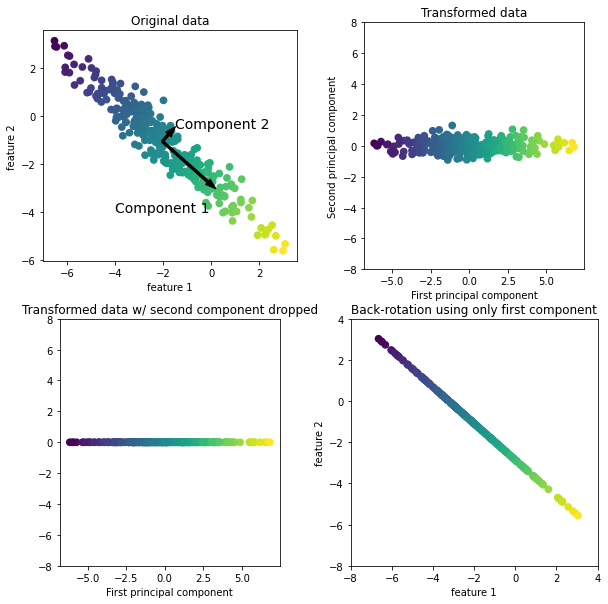

In [1]:
import mglearn
mglearn.plots.plot_pca_illustration()

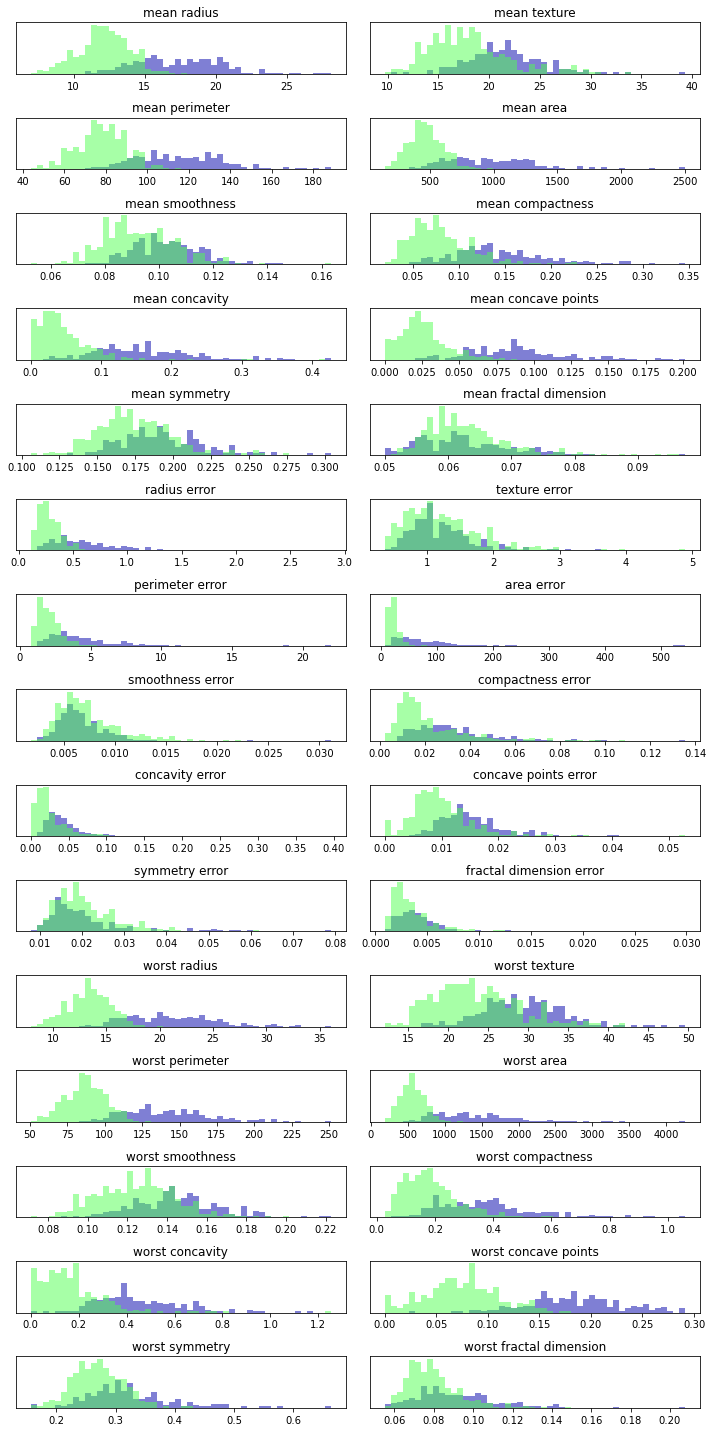

In [4]:
# using simple way to find a correlation between features
# in breast cancer dataset
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()

original shape (569, 30) reduced shape (569, 2)


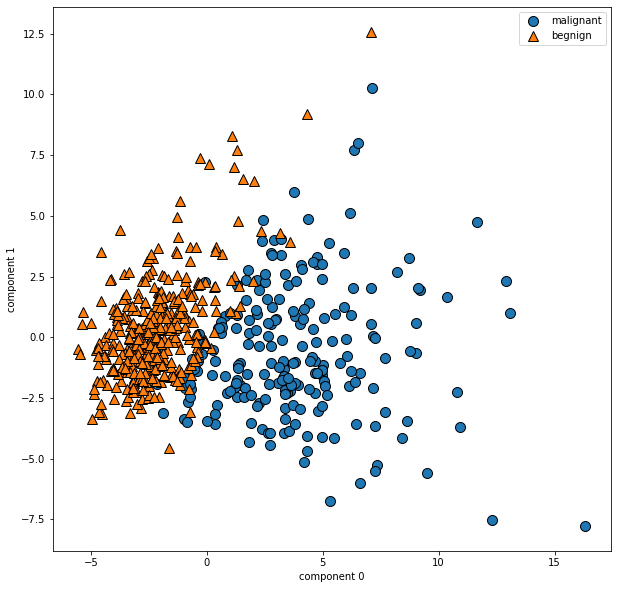

In [13]:
# now using PCA
# before apply PCA the features must be scaled using
# StandardScaler so they have 0 mean and 1 variance
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(cancer.data)

X_scaled = standardScaler.transform(cancer.data)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # keeps 2 principal components
pca.fit(X_scaled)

# transform data into the first 2 principal components
X_pca = pca.transform(X_scaled)
print("original shape {} reduced shape {}".format(str(X.shape), str(X_pca.shape)))

plt.figure(figsize=(10,10))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.legend(["malignant", "begnign"], loc="best")

In [15]:
# analyzing the PCA components
print("components shape {}".format(str(pca.components_.shape)))

components shape (2, 30)


Text(0, 0.5, 'Principal components')

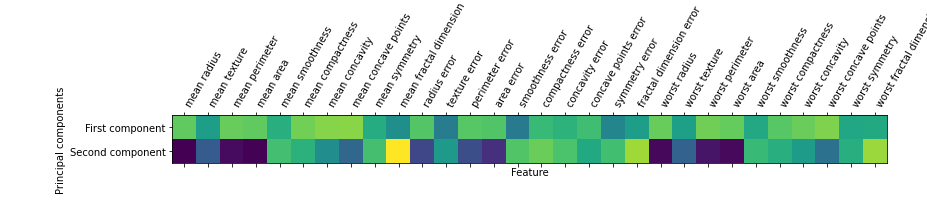

In [16]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")